In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import RandomForestRegressor, LinearRegression, GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt
silver = spark.read.format("delta").load("/mnt/dvfsilver/mutation_silver")
silver.display()

idmutation idmutinvar idopendata idnatmut codservch refdoc datemut anneemut moismut coddep libnatmut nbartcgi l_artcgi vefa valeurfonc nbdispo nblot nbcomm l_codinsee nbsection l_section nbpar l_idpar nbparmut l_idparmut nbsuf sterr l_dcnt nbvolmut nblocmut l_idlocmut nblocmai nblocapt nblocdep nblocact nbapt1pp nbapt2pp nbapt3pp nbapt4pp nbapt5pp nbmai1pp nbmai2pp nbmai3pp nbmai4pp nbmai5pp sbati sbatmai sbatapt sbatact sapt1pp sapt2pp sapt3pp sapt4pp sapt5pp smai1pp smai2pp smai3pp smai4pp smai5pp l_idv l_nomv codtypprov fiabmaxv l_ida l_noma codtypproa fiabmaxa ffsparc ffsterr l_ffdcnt nbpardisp nbparapp ffnblocmai ffnblocapt ffnblocdep ffnblocact ffnbactsec ffnbactter fftypact ffnbloch ffnblogsoc nblocanc nblocrecen nblocneuf ffancstmin ffancstmax periodecst ffnbloc1pp ffnbloc2pp ffnbloc3pp ffnbloc4pp ffnbloc5pp ffnbpdep ffnbpgarag ffnbpterra ffnbppisci ffnbpaut nblocdisp nblocapp batiment ffsbati ffshab ffsdep ffspro nbcstloc nbcstsoc nbcstmai nbcstapt nbcstact l_idcstloc nbcstloc4 nbcstsoc4 nbcstmai4 nbcstapt4 nbcstact4 l_idcstloc4 codtypbien libtypbien rapatffloc rapatffpar rapatgeom nbsite nbsite1km geomlocmut geomparmut geompar rolev rolea filtre devenir segmtab jour 6764839 3704P01_2018P00905 68f938d1c1ad1b9454ea5eb72ac49375 1 3704P01 2018P00905 2018-01-12 2018 1 37 Vente 1 372170000A2082,372170000A2086 false 203000.00 1 0 1 37217 1 {0A} 2 372170000A2082,372170000A2086 2 372170000A2082,372170000A2086 3 1878 {0,0,0,0,0,0,0,0,0,0,1294,0,584} 0 1 372170262608 1 0 0 0 0 0 0 0 0 0 0 0 1 0 75 75 0 0 0 0 0 0 0 0 0 0 75 0 37014749 _X_ X1 true 37014749 _X_ X1 true 1878 1878 {0,0,0,0,0,0,0,0,0,0,1294,0,584} 0 0 1 0 0 0 0 0 NULL 1 0 1 0 0 1997 1997 1990-2012 0 0 0 1 0 2 1 0 0 1 0 0 NULL 112 75 37 0 0 0 0 0 0 NULL 0 0 0 0 0 NULL 1113 UNE MAISON ANCIENNE true true true 1 1 01010000206A08000052B81E8598281F413333335301935941 01060000206A080000010000000103000000010000000800000052B81E85DC281F41E17A14AE03935941C3F5285C81281F415C8FC2F5F292594185EB51B872281F415C8FC295F2925941A4703D0A65281F41A4703D7A0A93594133333333A1281F41295C8F420A9359415C8FC2F5D7281F415C8FC2E50993594133333333F3281F415C8FC2D50793594152B81E85DC281F41E17A14AE03935941 01060000206A080000010000000103000000010000000800000052B81E85DC281F41E17A14AE03935941C3F5285C81281F415C8FC2F5F292594185EB51B872281F415C8FC295F2925941A4703D0A65281F41A4703D7A0A93594133333333A1281F41295C8F420A9359415C8FC2F5D7281F415C8FC2E50993594133333333F3281F415C8FC2D50793594152B81E85DC281F41E17A14AE03935941 NULL NULL 0 S NULL 12 6764840 3704P01_2018P02753 0769cdf5e9d3d2bcb6070f415449e235 1 3704P01 2018P02753 2018-03-20 2018 3 37 Vente 1 37261000BZ0343 false 40000.00 1 4 1 37261 1 {BZ} 1 37261000BZ0343 0 NULL 0 0 {0,0,0,0,0,0,0,0,0,0,0,0,0} 0 4 372610099834,372610099835,372610099893,372610099894 0 2 2 0 2 0 0 0 0 0 0 0 0 0 54 0 54 0 54 0 0 0 0 0 0 0 0 0 37020825 "SCI LA PREVOYANTE" G1 true 37027151 "SCI LE BOCAGE" G1 true 0 0 {0,0,0,0,0,0,0,0,0,0,0,0,0} 0 0 0 2 2 0 0 0 NULL 2 0 4 0 0 1973 1977 1961-1974 4 0 0 0 0 2 0 0 0 2 0 0 D 60 54 6 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL 1223 DEUX APPARTEMENTS ANCIENS true true true 1 1 01010000206A080000E17A142EE5062041EC51B88E11925941 NULL 01060000206A080000010000000103000000010000001A000000666666E66A07204152B81E850D9259413D0AD72348072041D7A370DD0D925941D7A3703D420720411F85EBA106925941666666E60007204114AE470102925941713D0A57CD062041713D0AB7FD9159410AD7A3707F0620418FC2F5D8F89159417B14AE477806204166666666F891594114AE4761760620413D0AD773F99159415C8FC2F5720620419A999919FC915941EC51B89E7106204114AE4701FF915941333333B371062041E17A142E01925941EC51B81E72062041CDCCCCCC029259413D0AD7237406204133333323059259413D0AD72378062041C3F528AC0792594114AE4761AB062041333333F325925941A4703D0AAF062041D7A370FD25925941C3F5285CB60620411F85EB1126925941D7A370BDC306204185EB5138269259418FC2F5A8ED062041000000B026925941333333B3FD062041D7A370DD26925941AE47E1FA08072041D7A370FD2692594114AE47E10A072041B81E850B26925941EC51B89E27072041666666D62692594152B81E05390720411F85EB51279259415C8

In [0]:
# 2. Création du prix au m²
silver_casted = silver.withColumn("valeurfonc", col("valeurfonc").cast(DoubleType()))
silver_casted = silver_casted.withColumn("prix_m2", col("valeurfonc") / col("sterr"))
silver_clean = silver_casted.filter((col("prix_m2").isNotNull()) & (col("prix_m2") > 10) & (col("prix_m2") < 50000))

# 3. Variables
cat_vars = ["l_codinsee", "libtypbien", "libnatmut", "anneemut", "codtypbien", "codtypprov", "codtypproa", "devenir", "rolea", "moismut"]
num_vars = ["sterr", "nblocmai", "nbpar", "nblocapp",
             "sbati", "sbatmai", "sbatapt", "sbatact",
             "sapt1pp", "sapt2pp", "sapt3pp", "sapt4pp", "sapt5pp",
             "smai1pp", "smai2pp", "smai3pp", "smai4pp", "smai5pp",
             "nbapt1pp", "nbapt2pp", "nbapt3pp", "nbapt4pp", "nbapt5pp"]

In [0]:
# 4. Cast des numériques et nettoyage
for col_num in num_vars:
    silver_clean = silver_clean.withColumn(col_num, col(col_num).cast(DoubleType()))
silver_clean = silver_clean.dropna(subset=cat_vars + num_vars + ["prix_m2"])

# 5. Encodage
indexers = [StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="skip") for c in cat_vars]
encoders = [OneHotEncoder(inputCols=[f"{c}_idx"], outputCols=[f"{c}_vec"]) for c in cat_vars]

# 6. Assembler
assembler = VectorAssembler(
    inputCols=[f"{c}_vec" for c in cat_vars] + num_vars,
    outputCol="features"
)

# 7. Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
df_encoded = pipeline.fit(silver_clean).transform(silver_clean)

In [0]:
# 8. Split train/test
train, test = df_encoded.randomSplit([0.8, 0.2], seed=42)


In [0]:
# 9. Modèles à tester
models = {
    "RandomForest": RandomForestRegressor(featuresCol="features", labelCol="prix_m2", numTrees=100),
    "LinearRegression": LinearRegression(featuresCol="features", labelCol="prix_m2"),
    "GradientBoostedTree": GBTRegressor(featuresCol="features", labelCol="prix_m2", maxIter=50)
}

# 10. Évaluation des modèles
results = []
evaluator = RegressionEvaluator(labelCol="prix_m2", predictionCol="prediction")

for name, model in models.items():
    fitted = model.fit(train)
    preds = fitted.transform(test)
    rmse = evaluator.evaluate(preds, {evaluator.metricName: "rmse"})
    r2 = evaluator.evaluate(preds, {evaluator.metricName: "r2"})
    results.append((name, rmse, r2))

# 11. Résultats comparatifs
print("\nComparaison des modèles :")
for name, rmse, r2 in results:
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.4f}")

# 12. Sélection du meilleur
best_model = min(results, key=lambda x: x[1])  # basé sur RMSE
print(f"\n✔️ Meilleur modèle : {best_model[0]} avec RMSE = {best_model[1]:.2f}")



Comparaison des modèles :
RandomForest: RMSE=645.54, R²=0.5172
LinearRegression: RMSE=783.10, R²=0.2895
GradientBoostedTree: RMSE=675.53, R²=0.4713

✔️ Meilleur modèle : RandomForest avec RMSE = 645.54


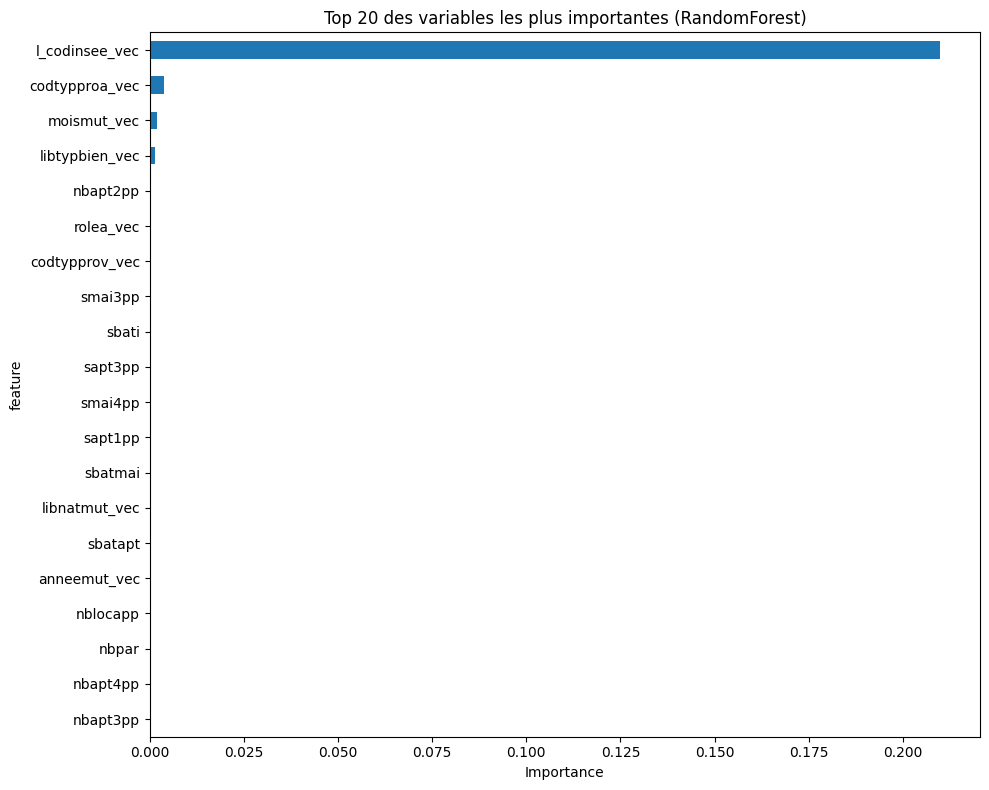

In [0]:
# 13. Récupération du meilleur modèle
best_model_name = best_model[0]
best_model_instance = models[best_model_name].fit(train)

# Vérification que c'est un modèle avec featureImportances
if hasattr(best_model_instance, "featureImportances"):
    importances = best_model_instance.featureImportances.toArray()
    features = assembler.getInputCols()

    feat_imp = pd.DataFrame(zip(features, importances), columns=["feature", "importance"])
    feat_imp = feat_imp.sort_values("importance", ascending=False)

    # Affichage top 20
    feat_imp.head(20).plot(kind="barh", x="feature", y="importance", figsize=(10, 8), legend=False)
    plt.gca().invert_yaxis()
    plt.title(f"Top 20 des variables les plus importantes ({best_model_name})")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print(f"Le modèle sélectionné ({best_model_name}) ne permet pas d'afficher les importances.")
